Some articles taken into consideration are : [Tokenization and Parts of Speech(POS) Tagging in Python’s NLTK library](https://medium.com/@gianpaul.r/tokenization-and-parts-of-speech-pos-tagging-in-pythons-nltk-library-2d30f70af13b)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pickle
import pandas as pd
import numpy as np
import random
import seaborn as sns 
import matplotlib.pyplot as plt

In [ ]:
#results for all classifiers
df = pickle.load(open('/content/drive/MyDrive/MasterThesis/Dataset/reults_union', 'rb'))
df.head(5)

,text,categories,length,clean_review,y_true,y_pred_cnn,y_pred_lstm,y_pred_bert,y_pred_bert_keras
0,This isn't a Mickey Mouse restaurant. Myself a...,"Restaurants, Party & Event Planning, Seafood, ...",29,isn mickey mouse restaurant people went dinner...,1,1,1,1,1
1,I don't know what these other reviewers are us...,"Hotels & Travel, Event Planning & Services, Ho...",52,know reviewers place disgusting buggers bed co...,0,0,0,0,0
2,The ladies behind the counter were very nice a...,"Chinese, Soup, Restaurants, Taiwanese, Sushi Bars",647,ladies counter nice friendly nice makes sadder...,0,0,0,0,0
3,My wife and I call this place GHETTO SUSHI.. T...,"Japanese, American (Traditional), Restaurants,...",204,wife place ghetto sushi decor pretty cool like...,0,0,0,0,0
4,Ive always like SHANE'S RIBSHACK ! Been going...,"Barbeque, Restaurants",41,ive like shane ribshack going years opened gre...,1,1,1,1,1


In [ ]:
#read the files with prediction as propabilitis

cnn_propab = pickle.load(open('/content/drive/MyDrive/MasterThesis/Dataset/cnn_pred_propab', 'rb')) 
lstm_propab = pickle.load(open('/content/drive/MyDrive/MasterThesis/Dataset/lstm_pred_propab', 'rb'))
bert_propab = pickle.load(open('/content/drive/MyDrive/MasterThesis/Dataset/bert_1_pred_propab', 'rb'))
bert_keras_propab = pickle.load(open('/content/drive/MyDrive/MasterThesis/Dataset/bert_keras_pred_propab', 'rb'))

In [ ]:
i=845 #{845, 1556, 1750, 2150, 2514, 2631, 2652, 2845, 3354, 3447, 3929}
print(cnn_propab[i], lstm_propab[i], bert_propab[i], bert_keras_propab[i])

[0.11975536] [0.12484765] [0.7979436 0.2020564] [0.6718037 0.3281963]


**Task 1**

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
def POS_func(i):
  sen = df.text[i] ##we take the full text to define POS so the words do not lose their syntactic meaning
  tok = nltk.word_tokenize(sen)
  print('Part of Speech:', nltk.pos_tag(tok))

In [ ]:
#Review One
POS_func(2570)

Part of Speech: [('#', '#'), ('To', 'TO'), ('the', 'DT'), ('Budget', 'NNP'), ('Traveler', 'NNP'), (':', ':'), ('FREE', 'JJ'), ('to', 'TO'), ('go', 'VB'), ('in', 'IN'), ('if', 'IN'), ('you', 'PRP'), ('see', 'VBP'), ('a', 'DT'), ('show', 'NN'), ('at', 'IN'), ('the', 'DT'), ('Velveeta', 'NNP'), ('room', 'NN'), ('.', '.'), ('Drinks', 'NNS'), ('are', 'VBP'), ('super', 'JJ'), ('cheap', 'JJ'), ('.', '.'), ('I', 'PRP'), ('went', 'VBD'), ('to', 'TO'), ('the', 'DT'), ('Velveeta', 'NNP'), ('Room', 'NNP'), (',', ','), ('because', 'IN'), ('I', 'PRP'), ('got', 'VBD'), ('a', 'DT'), ('free', 'JJ'), ('ticket', 'NN'), ('from', 'IN'), ('Esther', 'NNP'), ("'s", 'POS'), ('Follies', 'NNP'), ('.', '.'), ('Esther', 'NNP'), ("'s", 'POS'), ('Follies', 'NNP'), ('is', 'VBZ'), ('the', 'DT'), ('incredible', 'JJ'), ('comedy', 'NN'), ('show', 'NN'), ('and', 'CC'), ('political', 'JJ'), ('satire', 'NN'), ('next', 'JJ'), ('door', 'NN'), ('.', '.'), ('Perhaps', 'RB'), ('I', 'PRP'), ('went', 'VBD'), ('on', 'IN'), ('a', 'D

In [ ]:
#Review Two
POS_func(2095)

Part of Speech: [('First', 'NNP'), ('off', 'RP'), (',', ','), ('if', 'IN'), ('you', 'PRP'), ("'re", 'VBP'), ('gluten', 'JJ'), ('free', 'JJ'), ('this', 'DT'), ('place', 'NN'), ('gets', 'VBZ'), ('a', 'DT'), ('big', 'JJ'), ('thumbs', 'NN'), ('up', 'IN'), ('from', 'IN'), ('my', 'PRP$'), ('gf', 'NN'), ('(', '('), ('she', 'PRP'), ("'s", 'VBZ'), ('gluten', 'JJ'), ('free', 'JJ'), (')', ')'), ('.', '.'), ('Although', 'IN'), ('her', 'PRP$'), ('big', 'JJ'), ('tip', 'NN'), ('is', 'VBZ'), ('to', 'TO'), ('eat', 'VB'), ('it', 'PRP'), ('while', 'IN'), ('it', 'PRP'), ("'s", 'VBZ'), ('hot', 'JJ'), ('.', '.'), ('She', 'PRP'), ("'s", 'VBZ'), ('had', 'VBD'), ('(', '('), ('and', 'CC'), ('I', 'PRP'), ("'ve", 'VBP'), ('tried', 'VBN'), (')', ')'), ('the', 'DT'), ('gf', 'NN'), ('pasta', 'NN'), ('and', 'CC'), ('pizzas', 'NN'), ('which', 'WDT'), ('she', 'PRP'), ('loves', 'VBZ'), ('.', '.'), ('Second', 'NNP'), (',', ','), ('I', 'PRP'), ("'ve", 'VBP'), ('had', 'VBD'), ('the', 'DT'), ('regular', 'JJ'), ('pizza', 'NN

In [ ]:
#Review Three
POS_func(54)

Part of Speech: [('My', 'PRP$'), ('friend', 'NN'), ('and', 'CC'), ('I', 'PRP'), ('stayed', 'VBP'), ('here', 'RB'), ('last', 'JJ'), ('night', 'NN'), (',', ','), ('and', 'CC'), ('we', 'PRP'), ('had', 'VBD'), ('a', 'DT'), ('very', 'RB'), ('pleasant', 'JJ'), ('experience', 'NN'), ('.', '.'), ('The', 'DT'), ('look', 'NN'), ('of', 'IN'), ('the', 'DT'), ('place', 'NN'), ('is', 'VBZ'), ('very', 'RB'), ('modern', 'JJ'), ('and', 'CC'), ('clean', 'JJ'), (',', ','), ('though', 'IN'), ('our', 'PRP$'), ('room', 'NN'), ('was', 'VBD'), ('a', 'DT'), ('little', 'JJ'), ('small', 'JJ'), ('.', '.'), ('There', 'EX'), ('was', 'VBD'), ('about', 'IN'), ('a', 'DT'), ('foot', 'NN'), ('between', 'IN'), ('the', 'DT'), ('beds', 'NNS'), ('from', 'IN'), ('each', 'DT'), ('other', 'JJ'), ('and', 'CC'), ('from', 'IN'), ('the', 'DT'), ('walls', 'NNS'), (',', ','), ('and', 'CC'), ('the', 'DT'), ('bathroom', 'NN'), ('door', 'NN'), ('was', 'VBD'), ('a', 'DT'), ('sliding', 'JJ'), ('door', 'NN'), ('that', 'WDT'), ('also', 'RB

In [ ]:
#Review Four
POS_func(1019)

Part of Speech: [('I', 'PRP'), ('have', 'VBP'), ('been', 'VBN'), ('using', 'VBG'), ('this', 'DT'), ('vet', 'NN'), ('for', 'IN'), ('years', 'NNS'), ('but', 'CC'), ('after', 'IN'), ('my', 'PRP$'), ('last', 'JJ'), ('visit', 'NN'), (',', ','), ('I', 'PRP'), ('am', 'VBP'), ('done', 'VBN'), ('.', '.'), ('The', 'DT'), ('vet', 'NN'), ('I', 'PRP'), ('had', 'VBD'), ('before', 'IN'), ('-', ':'), ('Dr.', 'NNP'), ('Blanton', 'NNP'), ('was', 'VBD'), ('amazing', 'VBG'), ('.', '.'), ('I', 'PRP'), ('never', 'RB'), ('had', 'VBD'), ('to', 'TO'), ('worry', 'VB'), ('that', 'IN'), ('I', 'PRP'), ('would', 'MD'), ('be', 'VB'), ('charged', 'VBN'), ('for', 'IN'), ('tests', 'NNS'), ('that', 'WDT'), ('were', 'VBD'), ('not', 'RB'), ('necessary', 'JJ'), ('and', 'CC'), ('I', 'PRP'), ('always', 'RB'), ('knew', 'VBD'), ('my', 'PRP$'), ('cat', 'NN'), ('was', 'VBD'), ('in', 'IN'), ('good', 'JJ'), ('hands', 'NNS'), ('.', '.'), ('After', 'IN'), ('several', 'JJ'), ('years', 'NNS'), ('of', 'IN'), ('terrible', 'JJ'), ('trips

In [ ]:
#Review Five
POS_func(477)

Part of Speech: [('I', 'PRP'), ('waited', 'VBD'), ('almost', 'RB'), ('one', 'CD'), ('hour', 'NN'), ('!', '.'), ('Two', 'CD'), ('people', 'NNS'), ('at', 'IN'), ('the', 'DT'), ('front', 'NN'), ('desk', 'NN'), ('just', 'RB'), ('chatting', 'VBG'), ('away', 'RB'), ('.', '.'), ('I', 'PRP'), ('had', 'VBD'), ('signed', 'VBN'), ('in', 'IN'), (',', ','), ('but', 'CC'), ('not', 'RB'), ('one', 'CD'), ('person', 'NN'), ('even', 'RB'), ('inquired', 'VBN'), ('if', 'IN'), ('they', 'PRP'), ('could', 'MD'), ('help', 'VB'), ('me', 'PRP'), ('.', '.'), ('To', 'TO'), ('say', 'VB'), ('the', 'DT'), ('least', 'JJS'), ('I', 'PRP'), ('was', 'VBD'), ('very', 'RB'), ('angry', 'JJ'), ('when', 'WRB'), ('I', 'PRP'), ('had', 'VBD'), ('to', 'TO'), ('interrupt', 'VB'), ('their', 'PRP$'), ('conversation', 'NN'), ('and', 'CC'), ('ask', 'VB'), ('for', 'IN'), ('the', 'DT'), ('owner', 'NN'), ('.', '.'), ('It', 'PRP'), ('was', 'VBD'), ('no', 'DT'), ('big', 'JJ'), ('deal', 'NN'), ('to', 'TO'), ('them', 'PRP'), ('.', '.'), ('No

In [ ]:
#feature importance as the percentage of the participants who selected those feature as important for a specific sentiment

In [ ]:
feature_positive = ['maybe', 'comlpete', 'velveeta', 'room', 'comedy', 'cheap', 'stay', 'sure', 'good', 'couldn', 'place', 'recommend', 'sit', 'subpar', 'political', 'space', 'satire', 'big', 'breath', 'amateur', 'away', 'order', 'door', 'drink', 'esther', 'laughing',
                    'great', 'beers', 'seating', 'feel', 'stepped', 'pasta', 'unique', 'served', 'bread', 'menu', 'sign', 'meatballs', 'healthy', 'bit', 'gets', 'wine', 'higher',
                    'getting', 'want', 'pleasant', 'products', 'morrison', 'heart', 'little', 'beds', 'right', 'modern', 'edited', 'location', 'door', 'amazing', 'said', 'wifi', 'finding', 'plug', 'try', 'luxurious', 'free', 'area', 'lighting', 'appetizer', 'hours', 'room', 'clock', 'downtown',
                    'years', 'vet', 'treatment', 'extra', 'suggested', 'plain', 'decided', 'easier', 'rays', 'necessary', 'bank', 'paid', 'clients', 'trip', 'bad', 'prices', 'gone', 'apology', 'home', 'visit', 'increased',
                    'finally', 'apologized', 'conversation', 'massage', 'chatting', 'chiropractors', 'therapists', 'austin', 'fantastic', 'desk', 'ask', 'longevity', 'star', 'signed', 'trust', 'angry', 'help'
                    ]   
imp_positive = [0.0, 41.9, 0.0, 3.2, 32.3, 32.3, 6.5, 22.6, 79.05, 0.0, 6.5, 80.6, 3.2, 0.0, 3.2, 22.6, 19.4, 33.45, 3.2, 0.0, 3.2, 3.2, 0.0, 16.1, 0.0, 80.6,
                85.5, 29, 12.9, 3.2, 3.2, 9.7, 71, 12.9, 9.7, 6.5, 0, 6.5, 77.4,  0.0, 0.0, 19.4, 29.0,
                0.0, 3.2, 90.3, 12.9, 3.2, 19.4, 3.2, 9.7, 19.4, 48.4, 3.2, 19.4, 0.0, 77.4, 0.0, 0.0, 3.2, 6.5, 3.2, 71, 45.2, 9.7, 9.7, 12.9, 6.5, 6.5, 0.0, 22.6,
                6.5, 16.1, 32.3, 41.9, 25.8, 0.0, 0.0, 58.1, 0.0, 19.4, 0.0, 0.0, 9.7, 0.0, 0.0, 9.7, 0.0, 0.0, 16.1, 16.1, 16.1,
                12.9, 12.9, 12.9, 32.3, 19.4, 3.2, 19.4, 3.2,83.9, 0.0, 3.2, 9.7, 19.4, 0.0, 80.6, 0.0, 32.3
                ] 

In [ ]:
df_positive_sent = pd.DataFrame({"Features":feature_positive,
                  "Importance":imp_positive})
df_positive_sent = df_positive_sent.sort_values('Importance')

In [ ]:
df_small = df_positive_sent[-15:]

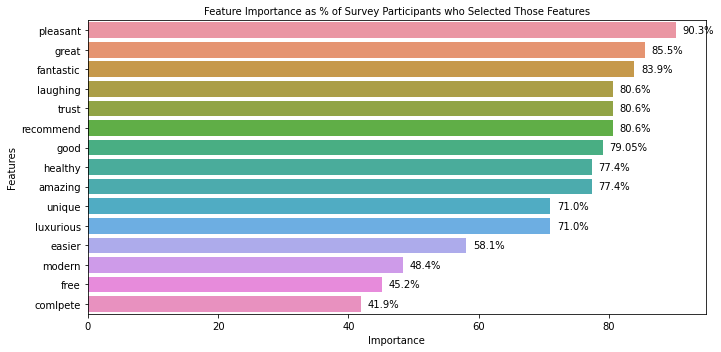

In [ ]:
plt.figure(figsize=(10,5))
# make barplot
ax = sns.barplot(x='Importance', y="Features", data=df_small, order=df_small.sort_values('Importance', ascending = False).Features)
# set labels
plt.xlabel("Importance", size=10)
plt.ylabel("Features", size=10)
plt.title("Feature Importance as % of Survey Participants who Selected Those Features", size=10)
plt.tight_layout()

for p in ax.patches:
 height = p.get_height() # height of horizontal bar
 width = p.get_width() # width
 # adding text to each bar
 ax.text(x = width+1, # x-coordinate position of data label, padded 3 to right of bar
 y = p.get_y()+(height/2), # # y-coordinate position of data label, padded to be in the middle of the bar
 s = str(width)+ '%', # data label, formatted to ignore decimals
 va = 'center') # sets vertical alignment (va) to center


In [ ]:
feature_negative = [ 'ticket', 'beat', 'night', 'super', 'check', 'comedian', 'bad', 'going', 'kind', 'music', 'not', 'drinks', 'incredible', 'felt', 'like', 'comedians', 'poor', 'fan', 'hear', 'why', 'traveler', 'follies', 'small', 'went',
                    'gluten', 'attention', 'healthier', 'serve', 'makes', 'places', 'restaurants', 'eaten', 'service', 'salad', 'restaurant', 'tip', 'food', 'stuffed', 'limited', 'hot', 'spinach', 'pizza', 'caesar', 'quality', 'chicken', 'away', 'flat', 'chain', 'regular', 'free', 'huge', 'suppose', 'cheese',
                    'distance', 'add', 'bathroom', 'water', 'exactly', 'stayed', 'look', 'way', 'wall', 'parking', 'street', 'busy', 'clean', 'friend', 'know',
                    'charged', 'instead', 'visited', 'trips', 'knew', 'told', 'office', 'voice', 'include', 'worry', 'run', 'old', 'putting', 'changed', 'got', 'offers', 'pulled', 'pressure', 'probably', 'place', 'included', 'wouldn',
                     'deal', 'money', 'waste', 'interrupt', 'gave', 'hour', 'inquired', 'person', 'grade', 'owner', 'time', 'waited', 'higher', 'people'
                    ]   
imp_negative = [9.7, 16.1, 1.6, 0.0, 0.0, 0.0, 90.3, 3.2, 3.2, 6.5, 33.5, 3.2, 0.0, 0.0, 0.0, 0.0, 74.2, 6.5, 3.2, 0.0, 0.0, 22.6, 29.0, 3.2,
                16.1, 16.1, 6.5, 6.5, 1.6, 3.2, 0.0, 3.2, 6.5, 0.0, 0.0, 6.5, 3.2, 12.9, 61.3, 6.5, 0.0, 0.0, 3.2, 9.7, 0.0, 20.95, 16.1, 6.5, 16.1, 3.2, 0.0, 3.2, 0.0,
                38.7, 0.0, 9.7, 19.4, 0.0, 0.0, 3.2, 9.7, 3.2, 9.7, 9.7, 87.1, 3.2, 3.2, 0.0,
                35.5, 19.4, 3.2, 6.5, 0.0, 0.0, 6.5, 0.0, 0.0, 71.0, 3.2, 25.8, 6.5, 3.2, 0.0, 0.0, 3.2, 58.1, 9.7, 4.85, 3.2, 45.2,
                6.5, 19.4, 93.5, 58.1, 0.0, 3.2, 0.0, 0.0, 3.2, 3.2, 9.7, 51.6, 0.0, 0.0
                ] 

In [ ]:
df_negative_sent = pd.DataFrame({"Features":feature_negative,
                  "Importance":imp_negative})
df_negative_sent = df_negative_sent.sort_values('Importance')

In [ ]:
df_small = df_negative_sent[-15:]

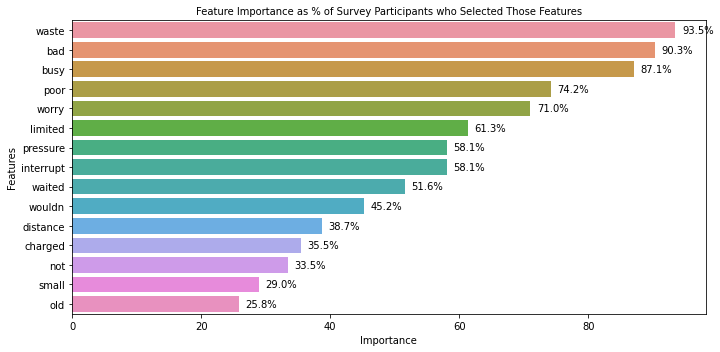

In [ ]:
plt.figure(figsize=(10,5))
# make barplot
ax = sns.barplot(x='Importance', y="Features", data=df_small, order=df_small.sort_values('Importance', ascending = False).Features)
# set labels
plt.xlabel("Importance", size=10)
plt.ylabel("Features", size=10)
plt.title("Feature Importance as % of Survey Participants who Selected Those Features", size=10)
plt.tight_layout()

for p in ax.patches:
 height = p.get_height() # height of horizontal bar
 width = p.get_width() # width
 # adding text to each bar
 ax.text(x = width+1, # x-coordinate position of data label, padded 3 to right of bar
 y = p.get_y()+(height/2), # # y-coordinate position of data label, padded to be in the middle of the bar
 s = str(width)+ '%', # data label, formatted to ignore decimals
 va = 'center') # sets vertical alignment (va) to center
